#### Importing the libraries 

In [135]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

Importing training and testing dataset and then merging them to perform cleaning

In [136]:
df_train=pd.read_csv("/Users/simar/Downloads/train.csv")
df_test=pd.read_csv("/Users/simar/Downloads/test.csv")

In [137]:
#Merging both train and test data sets so that we can apply pre-processing on both at the same time
df_train['Split'] = 'train'
df_test['Split'] = 'test'
merged_df = pd.concat([df_train, df_test], ignore_index=True)

### Data preprocessing/Cleaning

In [138]:
merged_df.describe()

,Senior_Citizen,Tenure,Monthly_Charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [139]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Multiple_Lines     7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

In [140]:
merged_df.nunique()

Customer_ID          7043
Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure                 73
Phone_Service           2
Multiple_Lines          3
Internet_Service        3
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1585
Total_Charges        6531
Churn                   2
Split                   2
dtype: int64

In [141]:
merged_df["Payment_Method"].value_counts()

Payment_Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [142]:
merged_df["Device_Protection"]

0                        No
1                       Yes
2       No internet service
3                        No
4                        No
               ...         
7038                     No
7039                     No
7040                    Yes
7041                     No
7042                     No
Name: Device_Protection, Length: 7043, dtype: object

In [143]:
#Since customer_ID is not useful in predicting churn
merged_df=merged_df.drop("Customer_ID",axis=1)
merged_df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Split
0,Male,0,No,Yes,1,No,No phone service,DSL,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,Yes,train
1,Female,0,No,No,7,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,No,train
2,Female,0,No,Yes,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,No,train
3,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No,train
4,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,Yes,train


In [144]:
#Making string columns numeric so that machine can understand
merged_df["Gender"]=merged_df["Gender"].replace({"Male":1,"Female":0})
merged_df["Internet_Service"]=merged_df["Internet_Service"].replace({"No":0,"Fiber optic":1,"DSL":2})
for column in ["Gender","Senior_Citizen","Partner","Dependents","Phone_Service","Paperless_Billing","Churn"]:
    merged_df[column]=merged_df[column].replace({"Yes":1,"No":0})
for column in ["Multiple_Lines","Online_Security","Online_Backup","Device_Protection","Tech_Support","Streaming_TV","Streaming_Movies"]:
    merged_df[column]=merged_df[column].replace({"No":0,"Yes":1,"No internet service":-1,"No phone service":-1})
    merged_df["Contract"]=merged_df["Contract"].replace({"Month-to-month":0,"One year":1,"Two year":2})
merged_df["Payment_Method"]=merged_df["Payment_Method"].replace({"Electronic check":0,"Mailed check":1,"Bank transfer (automatic)":2,"Credit card (automatic)":3})



In [145]:
merged_df

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Split
0,1,0,0,1,1,0,-1,2,0,0,...,0,0,0,0,1,0,25.30,25.3,1.0,train
1,0,0,0,0,7,1,0,1,0,0,...,0,0,0,0,1,0,75.15,525,0.0,train
2,0,0,0,1,4,1,0,0,-1,-1,...,-1,-1,-1,0,1,2,20.05,85.5,0.0,train
3,0,0,0,0,29,1,1,1,0,0,...,0,0,0,0,1,3,76.00,2215.25,0.0,train
4,0,0,0,0,3,1,1,1,0,0,...,0,0,0,0,1,3,75.10,270.7,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,3,1,1,1,0,0,...,0,0,0,0,1,0,75.80,246.3,NaN,test
7039,0,0,1,0,8,1,1,1,0,0,...,1,0,1,0,1,0,90.25,743.75,NaN,test
7040,1,0,0,0,29,1,1,2,0,1,...,0,0,1,1,0,3,70.90,1964.6,NaN,test
7041,0,0,0,0,2,0,-1,2,0,0,...,0,0,1,0,1,0,34.70,62.25,NaN,test


In [146]:
merged_df.isnull().sum()

Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure                  0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn                1761
Split                   0
dtype: int64

In [147]:
merged_df.loc[:,"Churn"] #NaN values of churn are in the test data set

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
7038    NaN
7039    NaN
7040    NaN
7041    NaN
7042    NaN
Name: Churn, Length: 7043, dtype: float64

In [148]:
merged_df.isnull().sum()

Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure                  0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn                1761
Split                   0
dtype: int64

In [149]:
merged_df.isna().sum()

Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure                  0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn                1761
Split                   0
dtype: int64

In [150]:
#Found some blank spaces Total_Charges column
merged_df[merged_df["Total_Charges"]==" "]

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Split
2067,1,0,1,1,0,1,1,0,-1,-1,...,-1,-1,-1,2,0,1,25.35,,0.0,train
2382,1,0,1,1,0,1,0,0,-1,-1,...,-1,-1,-1,1,1,1,19.70,,0.0,train
2551,1,0,1,1,0,1,0,0,-1,-1,...,-1,-1,-1,2,0,1,19.85,,0.0,train
3622,0,0,1,1,0,1,0,2,1,1,...,0,1,1,2,0,1,80.85,,0.0,train
4671,1,0,0,1,0,1,0,0,-1,-1,...,-1,-1,-1,2,0,1,20.25,,0.0,train
4678,0,0,1,1,0,1,0,0,-1,-1,...,-1,-1,-1,2,0,1,20.00,,0.0,train
4991,0,0,1,1,0,0,-1,2,1,0,...,1,1,0,2,1,2,52.55,,0.0,train
5247,1,0,1,1,0,1,1,0,-1,-1,...,-1,-1,-1,2,0,1,25.75,,0.0,train
6047,0,0,1,1,0,1,1,2,0,1,...,1,1,0,2,0,1,73.35,,NaN,test
6695,1,0,0,1,0,1,1,2,1,1,...,1,0,0,2,1,2,61.90,,NaN,test


In [151]:
merged_df.drop(merged_df.index[(merged_df["Total_Charges"]==" ")],axis=0,inplace=True)

In [152]:
merged_df[merged_df["Total_Charges"]==" "]

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Split


In [153]:
merged_df['Total_Charges']=merged_df["Total_Charges"].astype(float)

In [154]:
#Since pre-processing is done , again splitting both data sets as before
train_df = merged_df[merged_df['Split'] == 'train']
test_df = merged_df[merged_df['Split'] == 'test']

train_df = train_df.drop(columns=['Split'])
test_df = test_df.drop(columns=['Split'])

In [155]:
train_df["Churn"]=train_df["Churn"].astype(int)

In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5274 non-null   int64  
 1   Senior_Citizen     5274 non-null   int64  
 2   Partner            5274 non-null   int64  
 3   Dependents         5274 non-null   int64  
 4   Tenure             5274 non-null   int64  
 5   Phone_Service      5274 non-null   int64  
 6   Multiple_Lines     5274 non-null   int64  
 7   Internet_Service   5274 non-null   int64  
 8   Online_Security    5274 non-null   int64  
 9   Online_Backup      5274 non-null   int64  
 10  Device_Protection  5274 non-null   int64  
 11  Tech_Support       5274 non-null   int64  
 12  Streaming_TV       5274 non-null   int64  
 13  Streaming_Movies   5274 non-null   int64  
 14  Contract           5274 non-null   int64  
 15  Paperless_Billing  5274 non-null   int64  
 16  Payment_Method     5274 non-n

In [157]:
#Since churn column in test data is all null values
test_df=test_df.drop("Churn",axis=1)
test_df

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
5282,0,0,1,0,1,0,-1,2,0,0,0,0,0,0,0,1,0,24.80,24.80
5283,1,0,0,0,41,1,1,0,-1,-1,-1,-1,-1,-1,0,1,2,25.25,996.45
5284,0,0,1,1,52,1,0,0,-1,-1,-1,-1,-1,-1,2,0,1,19.35,1031.70
5285,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,76.35,76.35
5286,1,0,0,0,67,1,0,2,0,0,0,1,0,0,2,0,2,50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,1,0,75.80,246.30
7039,0,0,1,0,8,1,1,1,0,0,0,1,0,1,0,1,0,90.25,743.75
7040,1,0,0,0,29,1,1,2,0,1,1,0,0,1,1,0,3,70.90,1964.60
7041,0,0,0,0,2,0,-1,2,0,0,0,0,0,1,0,1,0,34.70,62.25


## Let's start EDA (Exploratory Data analysis)- A bit of feature engineering

#### Heat map - to get correlation  between different numerical features 

<Axes: >

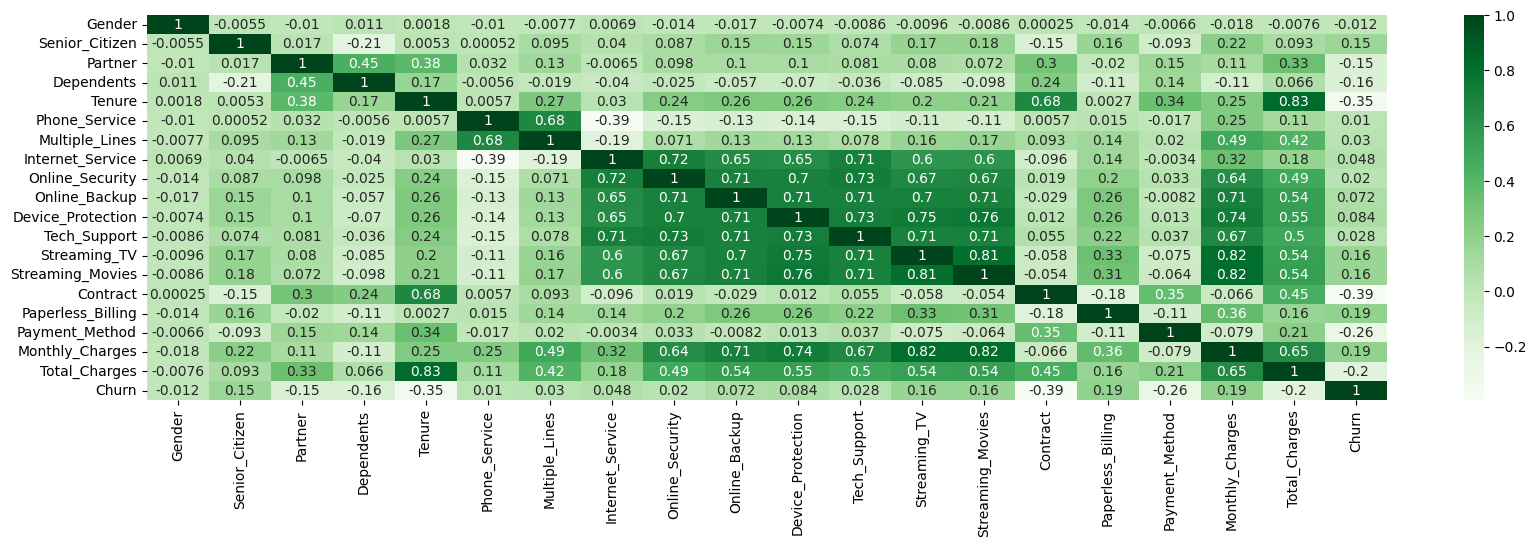

In [158]:
correlation=train_df.corr()
plt.figure(figsize = (20,5))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='Greens')

#### Conclusion from heat map:-
Conclusion:

* The values in the heatmap signifies the correlation between two entities, 1 represent total correlation.
* Negative values represent that if one value increases other decreases.
* As we can see in the map , entities in the middle have maximum relations.
* For eg, people who has more tenure has compartivaly more total charges due to the obvious facts that more tenure of service means more charges.

### Drawing pie charts to get insights of customer distributions 

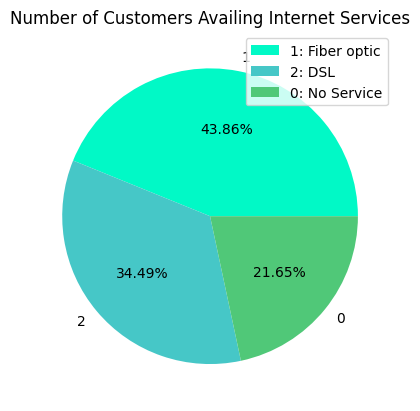

In [159]:
internet_service_labels = {0: 'No Service', 1: 'Fiber optic', 2: 'DSL'}
custom_palette = ['#01F9C6', '#46C7C7', '#50C878']

# Count the values for each internet service
value_counts = train_df['Internet_Service'].value_counts()

# Plotting the pie chart
ax = value_counts.plot(kind='pie', ylabel="", title="Number of Customers Availing Internet Services",
                       autopct='%1.2f%%', colors=custom_palette)

# Adding legend to the chart using the correct labels from the dictionary
ax.legend(labels=[f"{label}: {internet_service_labels[label]}" for label in value_counts.index], loc="best")
plt.show()


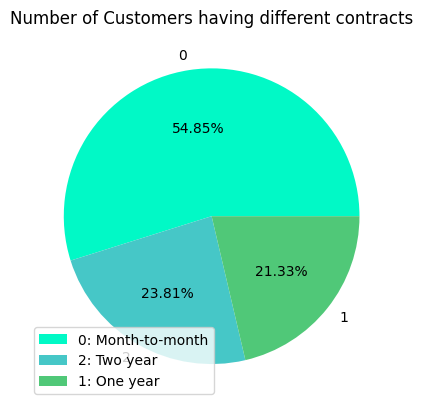

In [160]:
Contract_labels = {0: "Month-to-month", 1: "One year", 2: "Two year"}
custom_palette = ['#01F9C6', '#46C7C7', '#50C878']
# Count the values for each internet service
value_counts = train_df['Contract'].value_counts()
ax=train_df['Contract'].value_counts().plot(kind='pie',ylabel="",title="Number of Customers having different contracts",autopct='%1.2f%%',colors= custom_palette)
# Adding legend to the chart using the correct labels from the dictionary
ax.legend(labels=[f"{label}: {Contract_labels[label]}" for label in value_counts.index], loc="best")
plt.show()

#### Conclusions from customer distribution :- 
* The above piecharts are showing % distribution of customers in each segments.
* 43.86% customers use fiber optics , 21.65% customers use no internet services and rest use DSL.
* 54.85% customers have monthly contract, 23.81% have Two year contract and rest are having one year contract.

### How many customers churned having different contracts and internet services?

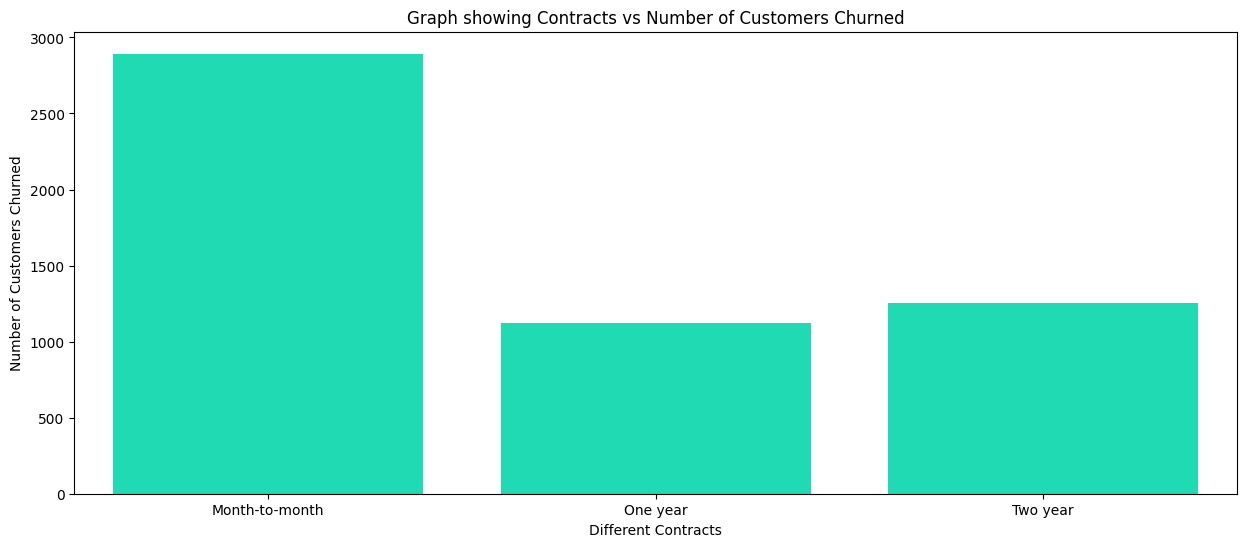

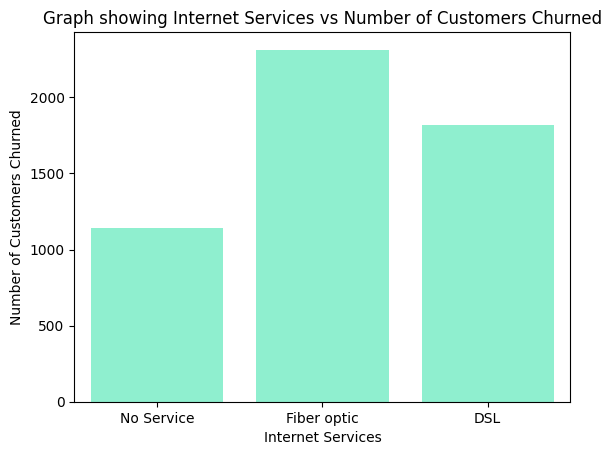

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

contract_labels = {0: "Month-to-month", 1: "One year", 2: "Two year"}
internet_service_labels = {0: 'No Service', 1: 'Fiber optic', 2: 'DSL'}

plt.figure(figsize=(15, 6))

# Plotting Contracts vs Number of Customers Churned
sns.countplot(x=train_df['Contract'].map(contract_labels), color='#01F9C6', order=contract_labels.values())
plt.xlabel("Different Contracts")
plt.ylabel("Number of Customers Churned")
plt.title("Graph showing Contracts vs Number of Customers Churned")
plt.show()

# Plotting Internet Services vs Number of Customers Churned
sns.countplot(x=train_df['Internet_Service'].map(internet_service_labels), color='#7FFFD4', order=internet_service_labels.values())
plt.xlabel("Internet Services")
plt.ylabel("Number of Customers Churned")
plt.title("Graph showing Internet Services vs Number of Customers Churned")
plt.show()


#### Conclusion:- 
* As seen from the graphs customer churn is maximum in month-to-month customer contract 
* In terms of internet services, churn in maximum in Fiber optics users 

### Let's find how monthly charges and total charges play the role in customers getting churned

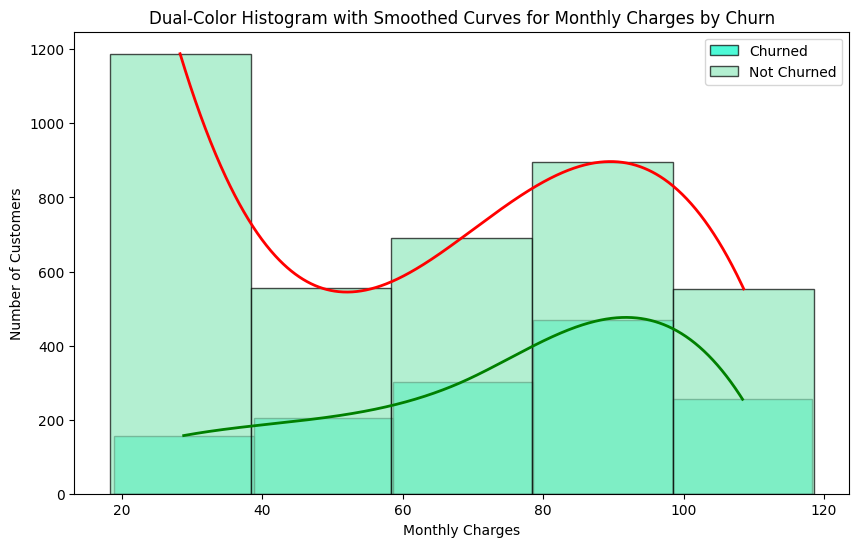

In [162]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 10))

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Sample data
churned_data_charge = train_df[train_df['Churn'] == 1]['Monthly_Charges']
not_churned_data_charge = train_df[train_df['Churn'] == 0]['Monthly_Charges']

# Plotting the dual-color histogram with joined bars using a curve
plt.figure(figsize=(10, 6))

# Histogram for churned customers (green bars)
n_churned, bins_churned, _ = plt.hist([churned_data_charge], bins=5, alpha=0.7, label=['Churned'], color='#01F9C6', edgecolor='black')

# Calculate the bin centers and heights for churned customers
bin_centers_churned = (bins_churned[:-1] + bins_churned[1:]) / 2
max_height_churned = bin_centers_churned[np.argmax(n_churned)]

# Interpolate to create a smooth curve for churned customers
f_churned = interp1d(bin_centers_churned, n_churned, kind='cubic')
x_smooth_churned = np.linspace(min(bin_centers_churned), max(bin_centers_churned), 1000)
y_smooth_churned = f_churned(x_smooth_churned)

# Plot the smoothed curve for churned customers
plt.plot(x_smooth_churned, y_smooth_churned, color='green', linestyle='-', linewidth=2)

# Histogram for non-churned customers (yellow bars)
n_not_churned, bins_not_churned, _ = plt.hist([not_churned_data_charge], bins=5, alpha=0.7, label=['Not Churned'], color='#93E9BE', edgecolor='black')

# Calculate the bin centers and heights for non-churned customers
bin_centers_not_churned = (bins_not_churned[:-1] + bins_not_churned[1:]) / 2
max_height_not_churned = bin_centers_not_churned[np.argmax(n_not_churned)]

# Interpolate to create a smooth curve for non-churned customers
f_not_churned = interp1d(bin_centers_not_churned, n_not_churned, kind='cubic')
x_smooth_not_churned = np.linspace(min(bin_centers_not_churned), max(bin_centers_not_churned), 1000)
y_smooth_not_churned = f_not_churned(x_smooth_not_churned)

# Plot the smoothed curve for non-churned customers
plt.plot(x_smooth_not_churned, y_smooth_not_churned, color='red', linestyle='-', linewidth=2)

# Set labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Dual-Color Histogram with Smoothed Curves for Monthly Charges by Churn')
plt.legend()

# Show the plot
plt.show()



#### Conclusion:
* Maximum customers are paying monthly charge of about 20-40 rupees and around 15% customers are churning in this region.
* Between 60-80, maximum customer churn rate is observed of about 50%.

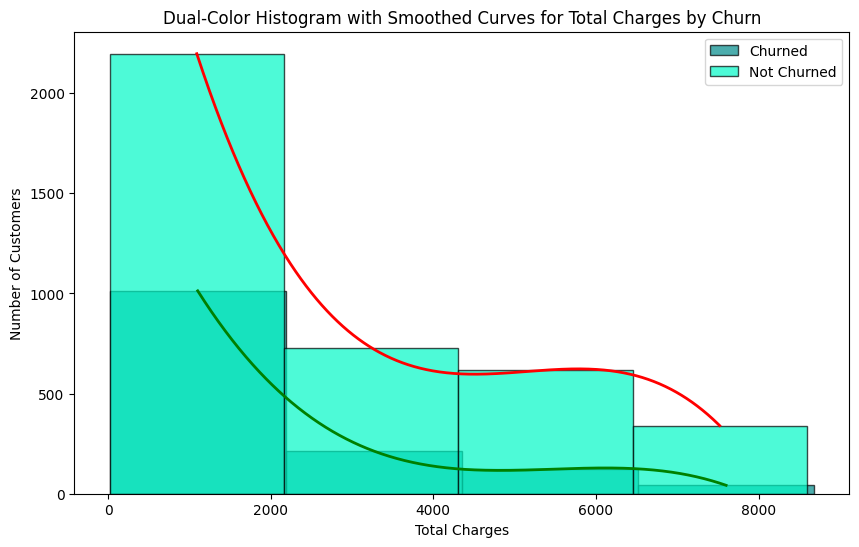

In [163]:
churned_data_charge_ = train_df[train_df['Churn'] == 1]['Total_Charges']
not_churned_data_charge_ = train_df[train_df['Churn'] == 0]['Total_Charges']

# Plotting the dual-color histogram with joined bars using a curve
plt.figure(figsize=(10, 6))

# Histogram for churned customers (green bars)
n_churned, bins_churned, _ = plt.hist([churned_data_charge_], bins=4, alpha=0.7, label=['Churned'], color='#008B8B', edgecolor='black')

# Calculate the bin centers and heights for churned customers
bin_centers_churned = (bins_churned[:-1] + bins_churned[1:]) / 2
max_height_churned = bin_centers_churned[np.argmax(n_churned)]

# Interpolate to create a smooth curve for churned customers
f_churned = interp1d(bin_centers_churned, n_churned, kind='cubic')
x_smooth_churned = np.linspace(min(bin_centers_churned), max(bin_centers_churned), 1000)
y_smooth_churned = f_churned(x_smooth_churned)

# Plot the smoothed curve for churned customers
plt.plot(x_smooth_churned, y_smooth_churned, color='green', linestyle='-', linewidth=2)

# Histogram for non-churned customers (yellow bars)
n_not_churned, bins_not_churned, _ = plt.hist([not_churned_data_charge_], bins=4, alpha=0.7, label=['Not Churned'], color='#01F9C6', edgecolor='black')

# Calculate the bin centers and heights for non-churned customers
bin_centers_not_churned = (bins_not_churned[:-1] + bins_not_churned[1:]) / 2
max_height_not_churned = bin_centers_not_churned[np.argmax(n_not_churned)]

# Interpolate to create a smooth curve for non-churned customers
f_not_churned = interp1d(bin_centers_not_churned, n_not_churned, kind='cubic')
x_smooth_not_churned = np.linspace(min(bin_centers_not_churned), max(bin_centers_not_churned), 1000)
y_smooth_not_churned = f_not_churned(x_smooth_not_churned)

# Plot the smoothed curve for non-churned customers
plt.plot(x_smooth_not_churned, y_smooth_not_churned, color='red', linestyle='-', linewidth=2)

# Set labels and title
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.title('Dual-Color Histogram with Smoothed Curves for Total Charges by Churn')
plt.legend()

# Show the plot
plt.show()

#### Conclusion:- 
* Maximum customers are paying total charge of about 0-2000 rupees and around 40% customers are churning in this region.
* This %churn is decreasing as total charge decreases.

### Plotting a boxplot to get outliers in features like Total charges

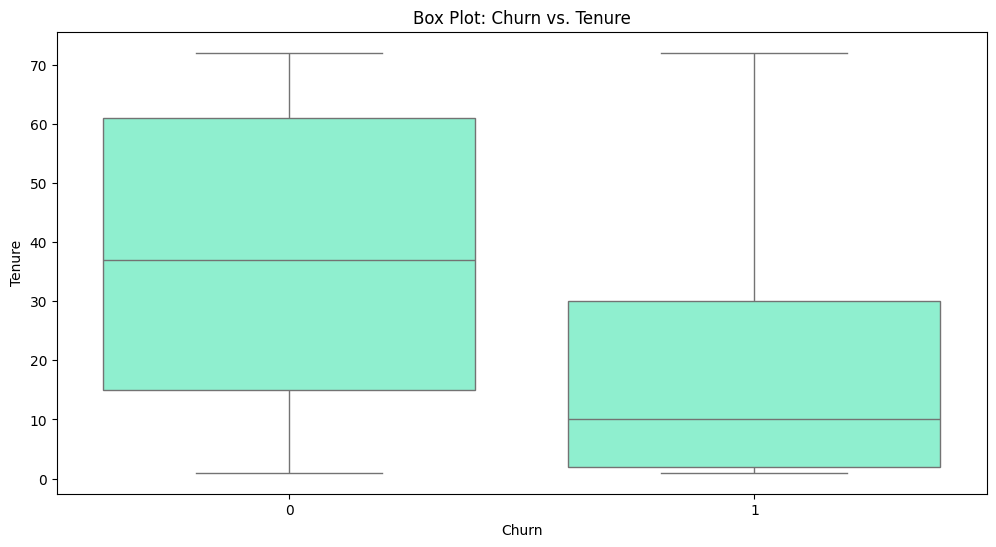

In [164]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='Tenure', data=train_df,color='#7FFFD4')
plt.title('Box Plot: Churn vs. Tenure')
plt.show()

#### Conclusion:- 

* From this graph we can intrepret median Tenure is between 35-40 and there are no dots signifying no outliers in the dataset that we need to remove in the dataset before training the model.

### SCATTERPLOT- Showing distribution of churn in Monthly and Total charges

### 

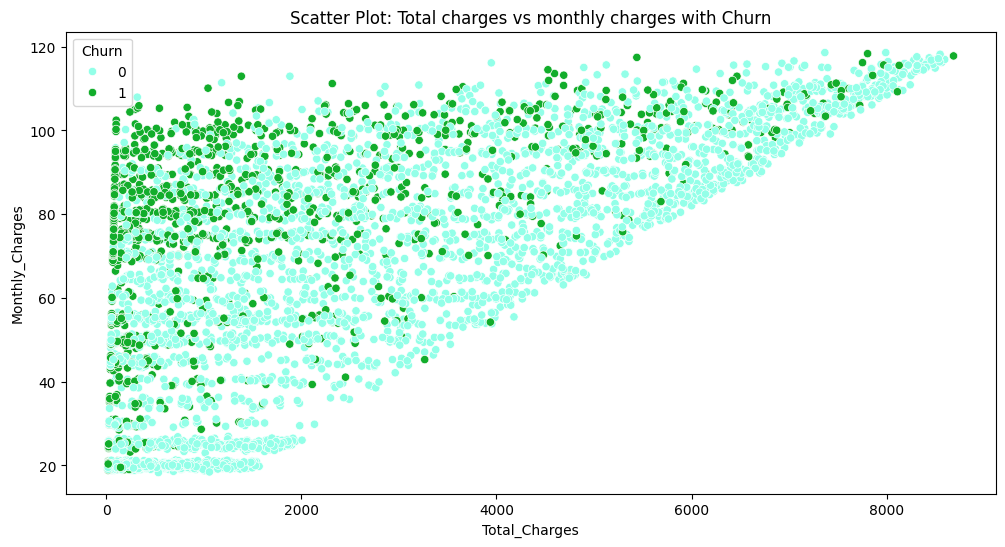

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
custom_palette = {0:'#93FFE8', 1:'#12AD2B'}
sns.scatterplot(x='Total_Charges', y='Monthly_Charges', hue='Churn', data=train_df, palette=custom_palette)
plt.title('Scatter Plot: Total charges vs monthly charges with Churn')
plt.show()


#### Conclusion:- 
* Churn is more when monthly charge is more.Showing monthly charge is more important factor than the total charge in determining the churn rate in customer.

### Why there are certain account lengths where customer churn is more prevalent?

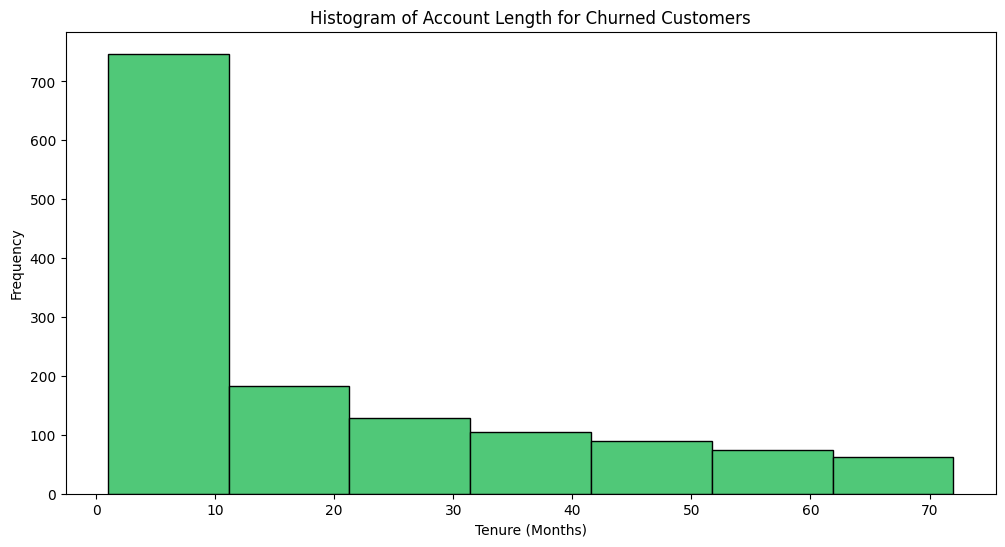

In [166]:
# histogram of tenure(account length) vs churned customers
plt.figure(figsize=(12, 6))
plt.hist(train_df[train_df['Churn'] == 1]['Tenure'], bins=7, color='#50C878', edgecolor='black')
plt.title('Histogram of Account Length for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

#### Conclusion :- 
* In tenure months between (0-10), churn is maximum and then keep on decreasing .

#### Do customers prefer Paperless billing?

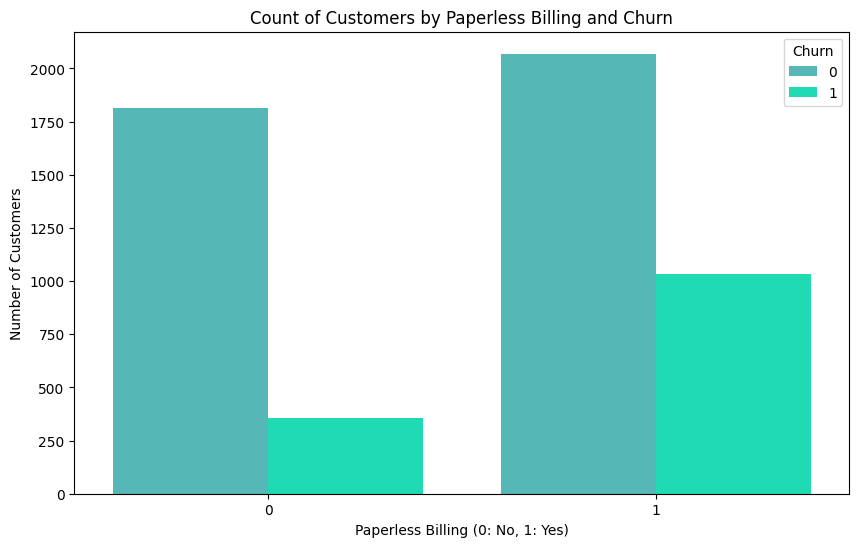

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
custom_palette = {0: '#46C7C7', 1: '#01F9C6'}  # Specify two colors for 'No' and 'Yes' categories
sns.countplot(x='Paperless_Billing', data=train_df, hue='Churn', palette=custom_palette)
plt.xlabel("Paperless Billing (0: No, 1: Yes)")
plt.ylabel("Number of Customers")
plt.title("Count of Customers by Paperless Billing and Churn")
plt.show()





### Is there any impact of having a partner on churn rate? 

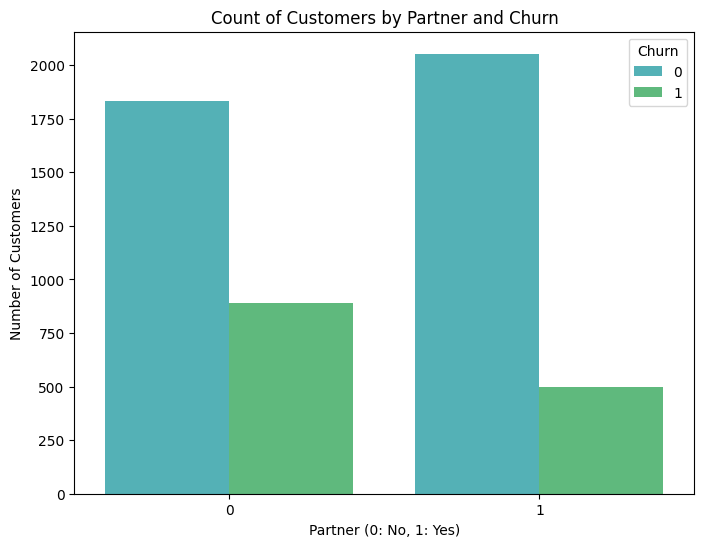

In [168]:
plt.figure(figsize=(8, 6))
custom_palette = {0: '#43BFC7', 1: '#50C878'}
sns.countplot(x='Partner', data=train_df, hue='Churn',palette=custom_palette)
plt.xlabel("Partner (0: No, 1: Yes)")
plt.ylabel("Number of Customers")
plt.title("Count of Customers by Partner and Churn")
plt.show()

#### Conclusion:- 

* It is observed churn % (500/(2000+500))*100 = 20% in customers having a partner.
* Whereas it is approx 31% in customers without a partner

### Lets's make some prediction models 

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Splitting training data into train and validation to test the accuracy and score of the model and normalising numerical columns
data_x=train_df.drop(["Churn"],axis=1)
data_y = train_df['Churn'].copy()

X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.2, random_state=1)
scaler=StandardScaler()
X_train_transformed=scaler.fit_transform(X_train)
X_train_transformed=pd.DataFrame(X_train_transformed,columns=['Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges'])


X_val_transformed=scaler.transform(X_val)
X_val_transformed=pd.DataFrame(X_val_transformed,columns=['Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges'])

X_test_transformed=scaler.transform(test_df)
X_test_transformed=pd.DataFrame(X_test_transformed,columns=['Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges'])

### kNN(K-Nearest Neighbours)


In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [171]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       782
           1       0.59      0.47      0.52       273

    accuracy                           0.78      1055
   macro avg       0.71      0.68      0.69      1055
weighted avg       0.76      0.78      0.77      1055



### Naive Bayes

In [172]:

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       782
           1       0.47      0.79      0.59       273

    accuracy                           0.72      1055
   macro avg       0.69      0.74      0.69      1055
weighted avg       0.79      0.72      0.74      1055



### Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       782
           1       0.62      0.46      0.53       273

    accuracy                           0.79      1055
   macro avg       0.73      0.68      0.70      1055
weighted avg       0.77      0.79      0.78      1055



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM(Support Vector Machine)

In [176]:

from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       782
           1       0.00      0.00      0.00       273

    accuracy                           0.74      1055
   macro avg       0.37      0.50      0.43      1055
weighted avg       0.55      0.74      0.63      1055



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [175]:
#Prediction of the test data-set provided using the best model from above
prediction=lg_model.predict(test_df)
pd.DataFrame(prediction,columns=["Churn"])

,Churn
0,0
1,0
2,0
3,1
4,0
...,...
1753,1
1754,1
1755,0
1756,1
